# **CS/CE 457/464 - Homework Assignment 8: Clustering**

### Breeha Qasim 08283

###### bq08283@st.habib.edu.pk

In [12]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Q1

In [15]:
irisdf = pd.read_csv('baskin_robbins_icecream.csv')
X = irisdf.drop(columns=['Flavour', 'Category'])
X

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0
...,...,...,...,...,...,...
65,200,10.0,0.4,24,21,4.0
66,120,0.5,0.0,27,20,0.1
67,80,1.5,0.0,16,12,1.0
68,160,8.0,0.2,20,16,2.0


## Q2

In [18]:
scaler = MinMaxScaler()
# transform data
XS = scaler.fit_transform(X)
# XS.head()
XS[1:5]

array([[0.34615385, 0.15      , 0.4       , 0.24      , 0.375     ,
        0.375     ],
       [0.38461538, 0.15      , 0.6       , 0.32      , 0.45833333,
        0.375     ],
       [0.19230769, 0.06666667, 0.2       , 0.16      , 0.5       ,
        0.375     ],
       [0.23076923, 0.03333333, 0.2       , 0.52      , 0.66666667,
        0.25      ]])

## Q3

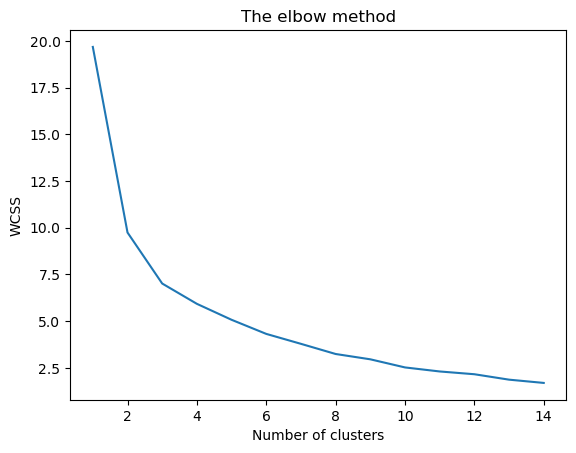

In [20]:
wss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init=10, random_state = 99)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')s
plt.show()

##### **^Explanation/Reasoning:** When the number of clusters rises, particularly between 1 and 4 clusters, the elbow method plot displays a dramatic decline in WCSS (Within-Cluster Sum of Squares). Since adding more clusters reduces WCSS, the curve begins to flatten at four clusters, indicating that this is the ideal number of clusters for the dataset.


## Q4

In [28]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(XS)
score = silhouette_score(XS, kmeans.labels_, metric='euclidean')
score

0.3583141783564117

## Q5

Text(0.5, 1.0, 'Clustering Results')

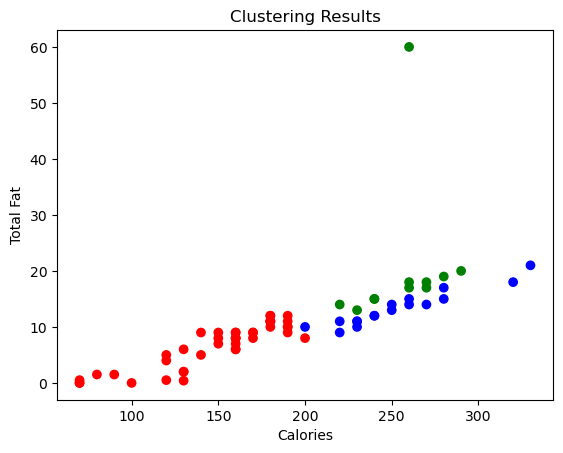

In [31]:
color2 = np.array(['green', 'red', 'blue'])
plt.scatter(x=X['Calories'], y=X['Total Fat (g)'], c=color2[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("Clustering Results")

##### **^Explanation/Reasoning:** The clustering findings are shown in the scatter plot, which groups data points according to total fat and calories. Patterns in the nutritional composition of the dataset are revealed by the distinct groupings of items with comparable calorie and fat levels, each of which is represented by a different colour.


## Q6

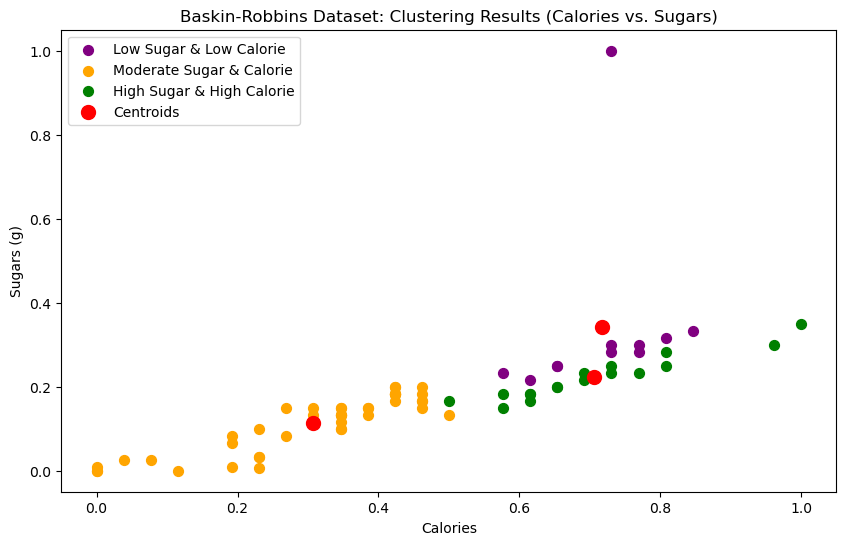

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(XS[Y == 0, 0], XS[Y == 0, 1], s=50, c='purple', label='Low Sugar & Low Calorie')
plt.scatter(XS[Y == 1, 0], XS[Y == 1, 1], s=50, c='orange', label='Moderate Sugar & Calorie')
plt.scatter(XS[Y == 2, 0], XS[Y == 2, 1], s=50, c='green', label='High Sugar & High Calorie')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.xlabel('Calories')
plt.ylabel('Sugars (g)')
plt.title("Baskin-Robbins Dataset: Clustering Results (Calories vs. Sugars)")
plt.legend()
plt.show()


##### **^Explanation/Reasoning:** Low sugar & low calorie, moderate sugar & calorie, and high sugar & high calorie are the three categories into which the clustering plot divides products according to their calorie and sugar content. By revealing information about the nutritional profile, this segmentation enables customised naming, such as "LowCal" or "SweetTooth," based on calorie and sugar levels.

## Q7

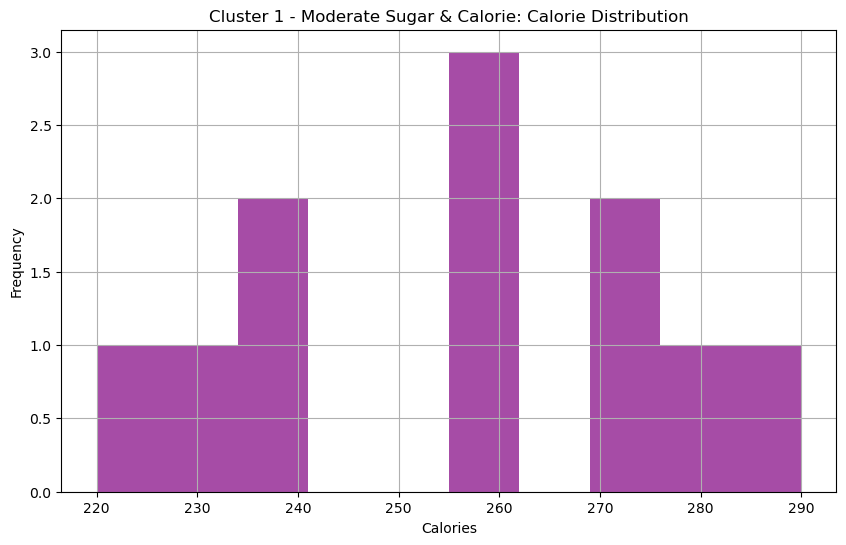

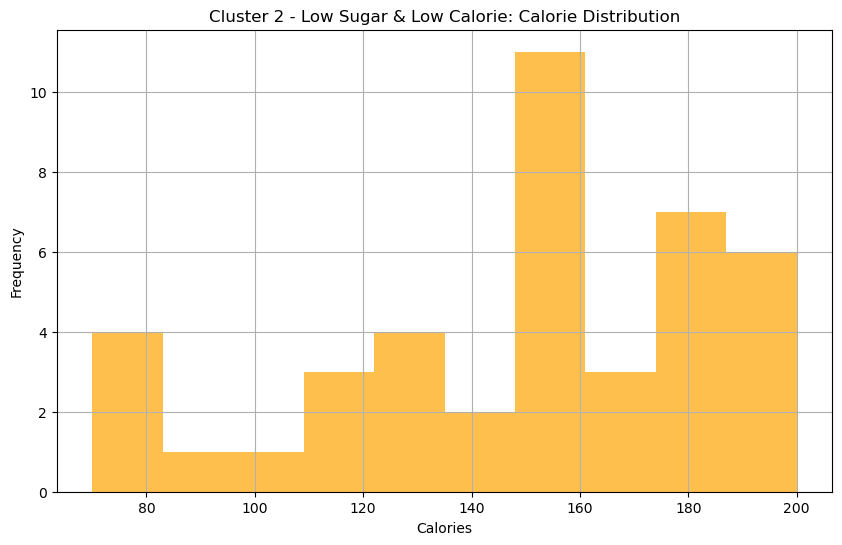

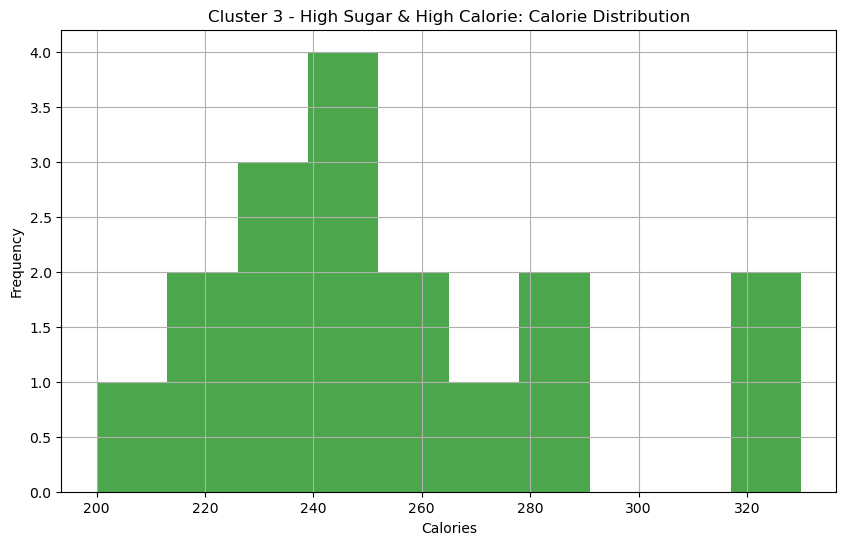

In [45]:
# Generating histograms and insights for each cluster as per the instructions.
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]

# Cluster 1 (Low Sugar & Low Calorie) - Calorie Distribution
plt.figure(figsize=(10, 6))
C1['Calories'].hist(color='purple', bins=10, alpha=0.7)
plt.title("Cluster 1 - Moderate Sugar & Calorie: Calorie Distribution")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

# Cluster 2 (Moderate Sugar & Calorie) - Calorie Distribution
plt.figure(figsize=(10, 6))
C2['Calories'].hist(color='orange', bins=10, alpha=0.7)
plt.title("Cluster 2 - Low Sugar & Low Calorie: Calorie Distribution")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

# Cluster 3 (High Sugar & High Calorie) - Calorie Distribution
plt.figure(figsize=(10, 6))
C3['Calories'].hist(color='green', bins=10, alpha=0.7)
plt.title("Cluster 3 - High Sugar & High Calorie: Calorie Distribution")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

##### **^Explanation/Reasoning:** The calorie distribution charts for each cluster highlight distinct calorie ranges within each group:

##### Cluster 1 (Moderate Sugar & Calorie): Items are concentrated around 260 calories, showing a balanced calorie level, offering a balanced choice for those who want a treat without excessive indulgence.
##### Cluster 2 (Low Sugar & Low Calorie): This cluster has a wide spread from 80 to 200 calories, with a peak around 140-160 calories, making it ideal for health-conscious consumers seeking lighter options. 
##### Cluster 3 (High Sugar & High Calorie): Items in this cluster are mostly in the 240-320 calorie range, indicating higher calorie content, appealing to customers who prioritize flavor and richness over calorie concerns.


### Q8
### C1:Slim Choices
### C2: Sweet Balance
### C3:Sugar Rush